In [1]:
import pandas as pd
import tensorflow as tf

2023-02-06 20:42:53.325735: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-06 20:42:53.423718: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-06 20:42:53.423739: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-06 20:42:54.006222: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
# Import Dataset
dataset = pd.read_csv('medical_paper_classification_dataset.csv')
x = dataset.iloc[:, -1].values
y = dataset.iloc[:, 1].values

In [3]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [4]:
# Split Dataset into Training and Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [5]:
# Text Vectorization
vectorize_layer = tf.keras.layers.TextVectorization(
    standardize='lower_and_strip_punctuation',
    max_tokens=20000,
    output_mode='int',
    output_sequence_length=1000,
)
vectorize_layer.adapt(x_train)

2023-02-06 20:42:56.079692: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-06 20:42:56.079713: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-06 20:42:56.079729: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Thinkpad-T490-1): /proc/driver/nvidia/version does not exist
2023-02-06 20:42:56.079934: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Build Model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer)
model.add(tf.keras.layers.Embedding(input_dim=20001, output_dim=128))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=25, batch_size=32)

Epoch 1/25
152/152 [==============================] - 11s 69ms/step - loss: 0.9972 - accuracy: 0.5217 - val_loss: 0.8393 - val_accuracy: 0.8325
Epoch 2/25
152/152 [==============================] - 10s 68ms/step - loss: 0.6985 - accuracy: 0.8400 - val_loss: 0.5720 - val_accuracy: 0.8911
Epoch 3/25
152/152 [==============================] - 10s 68ms/step - loss: 0.4985 - accuracy: 0.8827 - val_loss: 0.4207 - val_accuracy: 0.9216
Epoch 4/25
152/152 [==============================] - 10s 68ms/step - loss: 0.3706 - accuracy: 0.9147 - val_loss: 0.3163 - val_accuracy: 0.9299
Epoch 5/25
152/152 [==============================] - 10s 68ms/step - loss: 0.2815 - accuracy: 0.9377 - val_loss: 0.2418 - val_accuracy: 0.9472
Epoch 6/25
152/152 [==============================] - 10s 67ms/step - loss: 0.2155 - accuracy: 0.9480 - val_loss: 0.1899 - val_accuracy: 0.9546
Epoch 7/25
152/152 [==============================] - 10s 69ms/step - loss: 0.1731 - accuracy: 0.9521 - val_loss: 0.1537 - val_accuracy:

In [8]:
model.evaluate(x_test, y_test, batch_size=32)

48/48 [==============================] - 1s 20ms/step - loss: 0.0509 - accuracy: 0.9848


[0.050858110189437866, 0.9848084449768066]

In [9]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred.argmax(axis=1))
print(cm)
accuracy_score(y_test, y_pred.argmax(axis=1))
print(y_test[0:10], y_pred[0:10])

48/48 [==============================] - 1s 19ms/step
[[506   0   2]
 [  0 433   0]
 [ 21   0 552]]
[0 2 0 2 0 2 0 1 0 0] [[0.99507904 0.00492013 0.24845013]
 [0.12971276 0.01829648 0.99272496]
 [0.96100533 0.03023471 0.41060695]
 [0.09534325 0.02179966 0.9944408 ]
 [0.98173195 0.06629896 0.1625751 ]
 [0.04564685 0.09960953 0.9918152 ]
 [0.99528706 0.05847811 0.05608765]
 [0.15029687 0.9931849  0.21369042]
 [0.89106566 0.00711517 0.8478472 ]
 [0.9915679  0.00743051 0.29616132]]


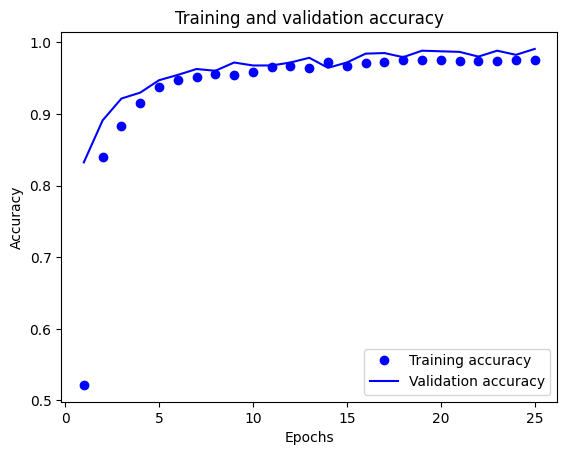

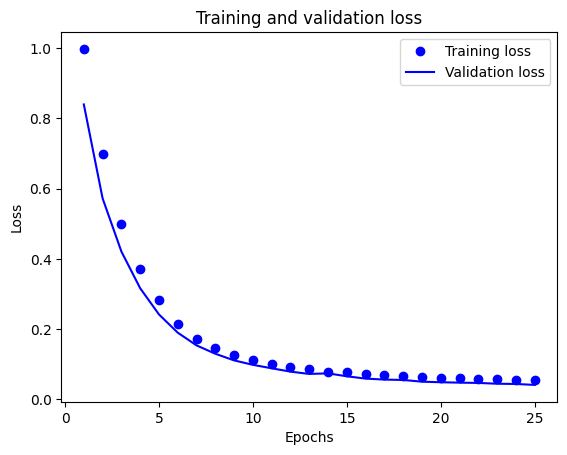

In [10]:
# Visualize Outcome

import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()